In [1]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from scipy.fft import fft
from scipy.signal import stft
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units
from Flight import Flight
from IPython.display import clear_output

from FlightTracker import FlightTracker

start_time='2024-01-01 00:00:00'
stop_time='2025-01-01 00:00:00'
tracker = FlightTracker(start_time, stop_time, destination='./flights/flights_2024.db', already_calculated=True)


In [3]:
flights['readtime_utc']= pd.to_datetime('2021-10-31 01:25:50.100000', format='ISO8601').dt.tz_localize('Europe/London').dt.tz_convert('UTC')


AttributeError: 'Timestamp' object has no attribute 'dt'

In [4]:

# Convert string to datetime
readtime = pd.to_datetime('2021-10-31 01:25:50.100000')

# Localize to Europe/London timezone
readtime_london = readtime.tz_localize('Europe/London')

# Convert to UTC
readtime_utc = readtime_london.tz_convert('UTC')

# Assuming flights is your DataFrame, create a new column 'readtime_utc'
flights['readtime_utc'] = readtime_utc

# If 'readtime_utc' is a column in the DataFrame that you want to modify
# You would need to apply the conversion to each element in the column, like this:
flights['readtime_utc'] = pd.to_datetime(flights['readtime_utc']).dt.tz_localize('Europe/London').dt.tz_convert('UTC')


AmbiguousTimeError: Cannot infer dst time from 2021-10-31 01:25:50.100000, try using the 'ambiguous' argument

In [2]:
start_time='2021-01-01 00:00:00'
stop_time='2022-01-01 00:00:00'
tracker_2021 = FlightTracker(start_time, stop_time, destination='./flights/flights_2021.db', already_calculated=True)


In [3]:
start_time='2022-01-01 00:00:00'
stop_time='2023-01-01 00:00:00'
tracker_2022 = FlightTracker(start_time, stop_time, destination='./flights/flights_2022.db', already_calculated=True)

In [4]:
start_time='2023-01-01 00:00:00'
stop_time='2024-01-01 00:00:00'
tracker_2023 = FlightTracker(start_time, stop_time, destination='./flights/flights_2023.db', already_calculated=True)

In [5]:
temp_df = temp_df.merge(temp_scores, on=['station_number', 'run_number', 'event_number'], how='left')

NameError: name 'temp_df' is not defined

In [9]:
flights = tracker.flights
fights_distinct = tracker.flights_distinct

In [8]:
flights = flights.merge(tracker_2021, on=['station_number', 'run_number', 'event_number'], how='left')

TypeError: Can only merge Series or DataFrame objects, a <class 'FlightTracker.FlightTracker'> was passed

In [5]:
flights = pd.concat([tracker_2021.flights, tracker_2022.flights, tracker_2023.flights, tracker.flights])
flights_distinct = pd.concat([tracker_2021.flights_distinct, tracker_2022.flights_distinct, tracker_2023.flights_distinct, tracker.flights_distinct])

In [8]:
con = sqlite3.connect('./flights/flights_all')

# Write the DataFrame to the SQLite database
flights.to_sql('flights_all', con)
flights_distinct.to_sql('flights_distinct_all', con)

# Close the database connection
con.close()

In [9]:
min_time = flights_distinct.date.min()
max_time = flights_distinct.date.max()

print(min_time)
print(max_time)

2021-06-16
2024-06-17


In [10]:

flights_distinct = sqldf('SELECT *, substr(flightnumber, 1, 3) as airline FROM flights_distinct')

## FlightTracker init

In [63]:
#-------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------
from FlightTracker import FlightTracker

start_time='2023-01-01 00:00:00'
stop_time='2024-01-01 00:00:00'
tracker = FlightTracker(start_time, stop_time, destination='./flights/flights_2023.db', already_calculated = True)
flights = tracker.flights
flights_distinct = tracker.flights_distinct
flights_distinct = sqldf('SELECT *, substr(flightnumber, 1, 3) as airline FROM flights_distinct')
flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta,airline
0,4128,CLX17K,2023-01-01,2023.01.01-040336.db,2023-01-01 01:07:57.300000,2023-01-01 01:11:38.400000,112.5,8.6,87.0,CLX
1,4129,AFR271,2023-01-01,2023.01.01-040336.db,2023-01-01 01:14:44.300000,2023-01-01 01:22:31.500000,12.0,10.2,79.0,AFR
2,4130,N/A,2023-01-01,2023.01.01-040336.db,2023-01-01 01:18:45.400000,2023-01-01 01:18:45.400000,146.6,8.1,0.0,N/A
3,4131,N/A,2023-01-01,2023.01.01-040336.db,2023-01-01 08:34:32.500000,2023-01-01 17:34:45.100000,109.1,8.7,54.0,N/A
4,4132,BOX488,2023-01-01,2023.01.01-040336.db,2023-01-01 01:18:50.500000,2023-01-01 01:24:37.100000,72.6,8.1,82.0,BOX
...,...,...,...,...,...,...,...,...,...,...
6890,754,THY9WC,2023-12-31,2023.12.31-171747.db,2023-12-31 09:01:14.600000,2023-12-31 09:04:35.600000,118.0,9.5,88.0,THY
6891,755,SAS936,2023-12-31,2023.12.31-171747.db,2023-12-31 10:37:47.800000,2023-12-31 10:43:44.500000,26.6,10.7,86.0,SAS
6892,756,ACA78,2023-12-31,2023.12.31-171747.db,2023-12-31 10:50:01.400000,2023-12-31 10:52:27.100000,138.3,8.9,89.0,ACA
6893,757,AFR291,2023-12-31,2023.12.31-171747.db,2023-12-31 15:59:06.500000,2023-12-31 16:07:23.900000,14.1,9.9,75.0,AFR


## Number of flights per airline (in radius)

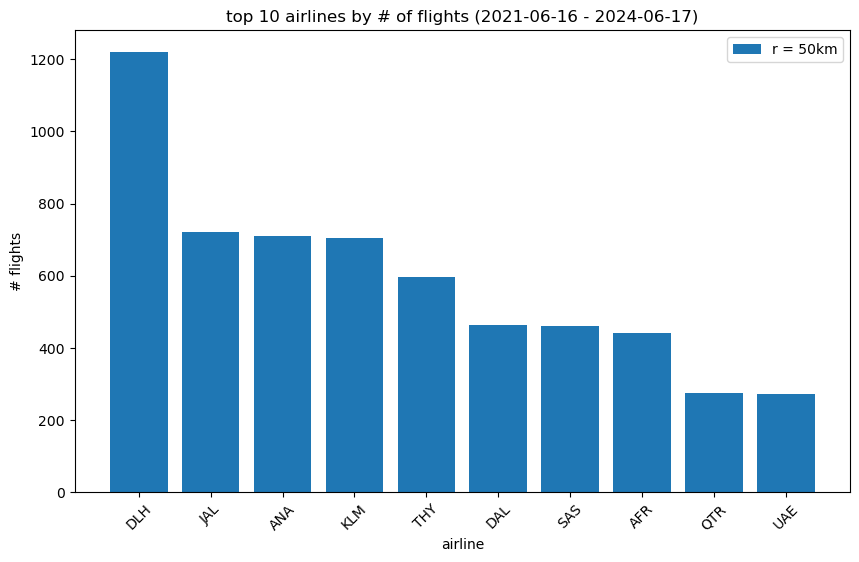

In [16]:
radius = 50
query = f'''
SELECT 
    airline
    ,count(airline) as count
FROM (
    SELECT 
        substr(flightnumber, 1, 3) as airline 
    FROM flights_distinct
    WHERE min_r < {radius}
)t0
GROUP BY airline
ORDER BY count(airline) desc

'''


result = sqldf(query)
top_10 = result.head(10)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_10['airline'], top_10['count'], label ='r = 50km')
plt.title(f'top 10 airlines by # of flights ({min_time} - {max_time})')
plt.legend()
plt.xlabel('airline')
plt.ylabel('# flights')
plt.xticks(rotation=45)
plt.show()
#plt.savefig(f'saved_figures/top_10_airlines_50km_{min_time} - {max_time}.pdf')

In [59]:
radius = 50
query = f'''
SELECT 
    airline
    ,min(theta) as min_theta
    ,max(theta) as max_theta
FROM (
    SELECT 
        substr(flightnumber, 1, 3) as airline 
        ,theta
    FROM flights_distinct
    WHERE min_r < {radius}
)t0
--Where airline = "DLH"
GROUP BY airline
ORDER BY count(airline) desc

'''


result = sqldf(query)
result

,airline,min_theta,max_theta
0,DLH,84.0,90.0
1,THY,86.0,90.0
2,KLM,75.0,90.0
3,SAS,86.0,87.0
4,AFR,72.0,88.0
...,...,...,...
84,CGE,78.0,78.0
85,CFM,83.0,83.0
86,BTX,90.0,90.0
87,BLX,88.0,88.0


## Get trajectories for 1 airline

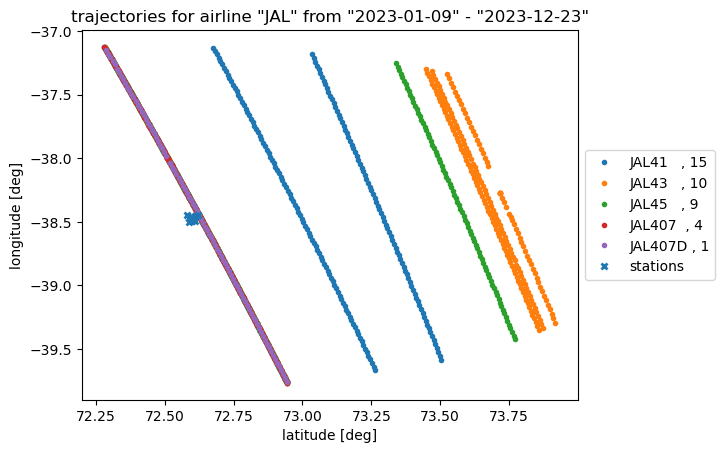

In [73]:
airline = 'JAL'
flights_one_airline = flights[flights.flightnumber.str.startswith(airline)]
flights_one_airline_distinct = flights_distinct[flights_distinct.flightnumber.str.startswith(airline)]

flightnumbers = sqldf(f'Select distinct flightnumber from flights_one_airline_distinct where min_r < {radius}')

for i in range(len(flightnumbers)):
    number_of_flights = sqldf(f'Select count(flightnumber) as counter from flights_one_airline_distinct Where flightnumber like "%{flightnumbers.flightnumber.iloc[i]}%" group By flightnumber')
    plt.plot(flights_one_airline[flights_one_airline.flightnumber == flightnumbers.flightnumber.iloc[i]].latitude, flights_one_airline[flights_one_airline.flightnumber == flightnumbers.flightnumber.iloc[i]].longitude, '.', label = f'{flightnumbers.flightnumber.iloc[i]}, {number_of_flights.counter.iloc[0]}')
plt.plot(tracker.stations.latitude, tracker.stations.longitude, 'x', label = 'stations', markersize = 5, markeredgewidth=2, c = 'C0')
plt.title(f'trajectories for airline "{airline}" from "{min(flights_one_airline.date)}" - "{max(flights_one_airline.date)}"')
plt.xlabel('latitude [deg]')
plt.ylabel('longitude [deg]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Number of flights per day (for 4 radii)

In [18]:
def query(min_r):

    return f'''
    Select 
        date, 
        count(flightnumber) as counter
    from flights_distinct
    Where min_r < {min_r}
    Group By date
    '''

import matplotlib.ticker as ticker
for i in [150, 100, 50, 25]:
    flights_per_day = sqldf(query(i))
    plt.plot(flights_per_day.date, flights_per_day.counter, label = f'{i} km', alpha = 0.75)
    plt.title(f'Number of flights per day')
plt.xlabel('date')
plt.ylabel('# of flights')
plt.legend()
#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#plt.savefig(f'saved_figures/flights_per_day_all.pdf')

PandaSQLException: (sqlite3.OperationalError) no such function: month
[SQL: 
    Select 
        *
    from (
        Select 
            date, 
            month(date) as month,
            count(flightnumber) as counter
        from flights_distinct
        Where min_r < 150
    )t0
    Group By month
    ]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [19]:
flights_distinct['datetime_date'] = pd.to_datetime(flights_distinct.date)
flights_distinct['iso_day'] = flights_distinct.datetime_date.dt.isocalendar().day
flights_distinct['iso_month'] = flights_distinct.datetime_date.dt.month
flights_distinct['iso_year'] = flights_distinct.datetime_date.dt.year

In [24]:
flights_distinct.iso_year.unique()

array([2021, 2022, 2023, 2024], dtype=int32)

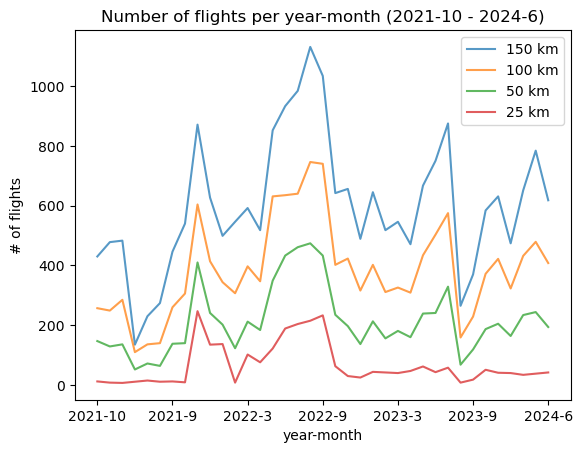

In [36]:
def query(min_r):

    return f'''
    Select 
        year_month
        ,count(flightnumber) as counter
    from (
        Select 
            iso_year || '-' || iso_month as year_month
            ,flightnumber
        from flights_distinct
        Where min_r < {min_r}
    )t0
    Group By year_month
    '''

import matplotlib.ticker as ticker
for i in [150, 100, 50, 25]:
    flights_per_day = sqldf(query(i))
    date_min = flights_per_day.year_month.min()
    date_max = flights_per_day.year_month.max()
    plt.plot(flights_per_day.year_month, flights_per_day.counter, label = f'{i} km', alpha = 0.75)
    plt.title(f'Number of flights per year-month ({date_min} - {date_max})')
plt.xlabel('year-month')
plt.ylabel('# of flights')
plt.legend()
# Customizing the x-axis to show Mo-Su
#years = ['2020', '2021', '2022', '2023', '2024']
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=7))
#plt.gca().xaxis.set_major_locator(ticker.FixedLocator(range(1, 6)))
#plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(years))

#plt.savefig(f'saved_figures/flights_per_year_month_{date_min}_{date_max}.pdf')

## Number of flights per weekday (4 radii)

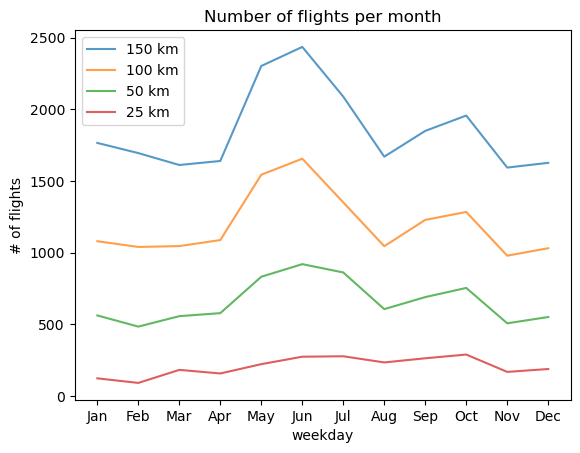

In [28]:
def query(min_r):

    return f'''
    Select 
        iso_month, 
        count(flightnumber) as counter
    from flights_distinct
    Where min_r < {min_r}
    Group By iso_month
    '''

import matplotlib.ticker as ticker
for i in [150, 100, 50, 25]:
    flights_per_day = sqldf(query(i))
    plt.plot(flights_per_day.iso_month, flights_per_day.counter, label = f'{i} km', alpha = 0.75)
    plt.title('Number of flights per month')
plt.xlabel('weekday')
plt.ylabel('# of flights')
plt.legend()
# Customizing the x-axis to show Mo-Su
months_of_year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.gca().xaxis.set_major_locator(ticker.FixedLocator(range(1, 13)))
plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(months_of_year))

#plt.savefig('saved_figures/flights_per_month_all.pdf')

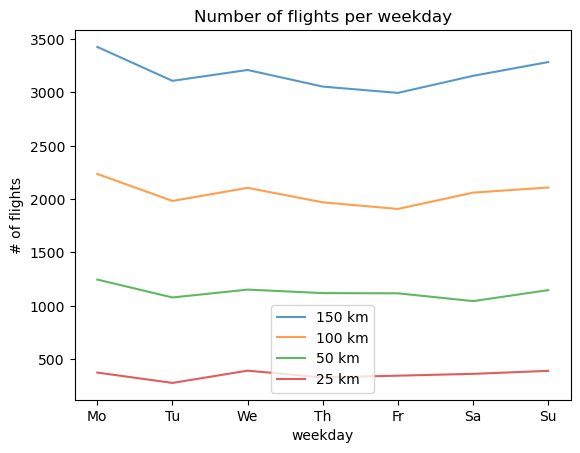

In [29]:
def query(min_r):

    return f'''
    Select 
        iso_day, 
        count(flightnumber) as counter
    from flights_distinct
    Where min_r < {min_r}
    Group By iso_day
    '''

import matplotlib.ticker as ticker
for i in [150, 100, 50, 25]:
    flights_per_day = sqldf(query(i))
    plt.plot(flights_per_day.iso_day, flights_per_day.counter, label = f'{i} km', alpha = 0.75)
    plt.title('Number of flights per weekday')
plt.xlabel('weekday')
plt.ylabel('# of flights')
plt.legend()
# Customizing the x-axis to show Mo-Su
days_of_week = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1, 2, 3, 4, 5, 6, 7]))
plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(days_of_week))
#plt.savefig('saved_figures/flights_per_weekday_all.pdf')

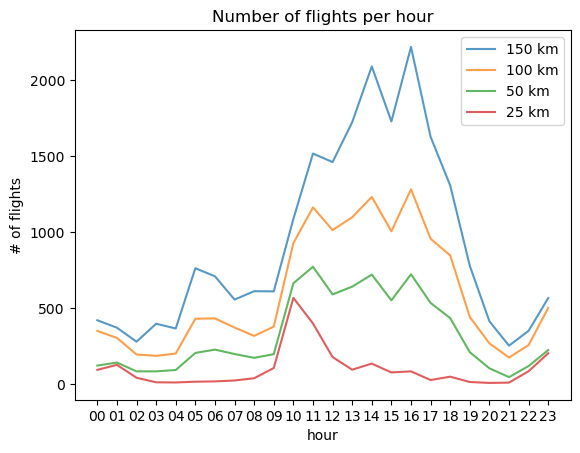

In [30]:
def query(min_r):

    return f'''
    Select 
        strftime('%H', mintime) as hour
        ,count(flightnumber) as counter
    from flights_distinct
    Where min_r < {min_r}
    Group By strftime('%H', mintime)
    '''

import matplotlib.ticker as ticker
for i in [150, 100, 50, 25]:
    flights_per_day = sqldf(query(i))
    plt.plot(flights_per_day.hour, flights_per_day.counter, label = f'{i} km', alpha = 0.75)
    plt.title('Number of flights per hour')
plt.xlabel('hour')
plt.ylabel('# of flights')
plt.legend()
# Customizing the x-axis to show Mo-Su
#days_of_week = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
#plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1, 2, 3, 4, 5, 6, 7]))
#plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(days_of_week))
#plt.savefig('saved_figures/flights_per_hour_all.pdf')
#flights_per_day
#flights_per_day